# EZ Merc Intergalactic

EZ Merc International is an intergalactic bounty hunter service where we'll do any job... for the right price. We currently have eight handlers spanning 18 different systems. These handlers hand pick a registered bounty hunter specializing in various forms of combat and espionage, there isn't a job we can't handle. Just interface with us on your comm-unit and we'll do the rest! 

### Business Process Flow

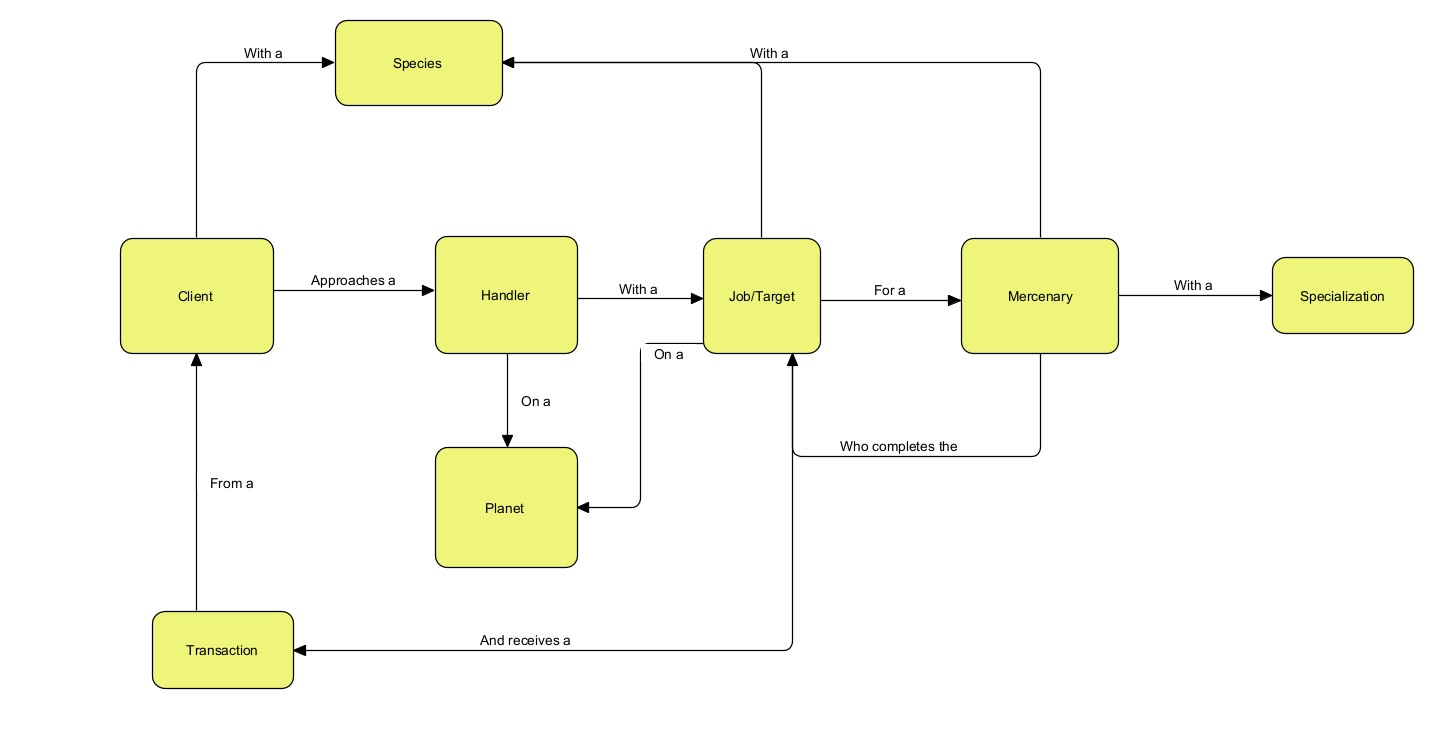

### Entity Relationship Diagram

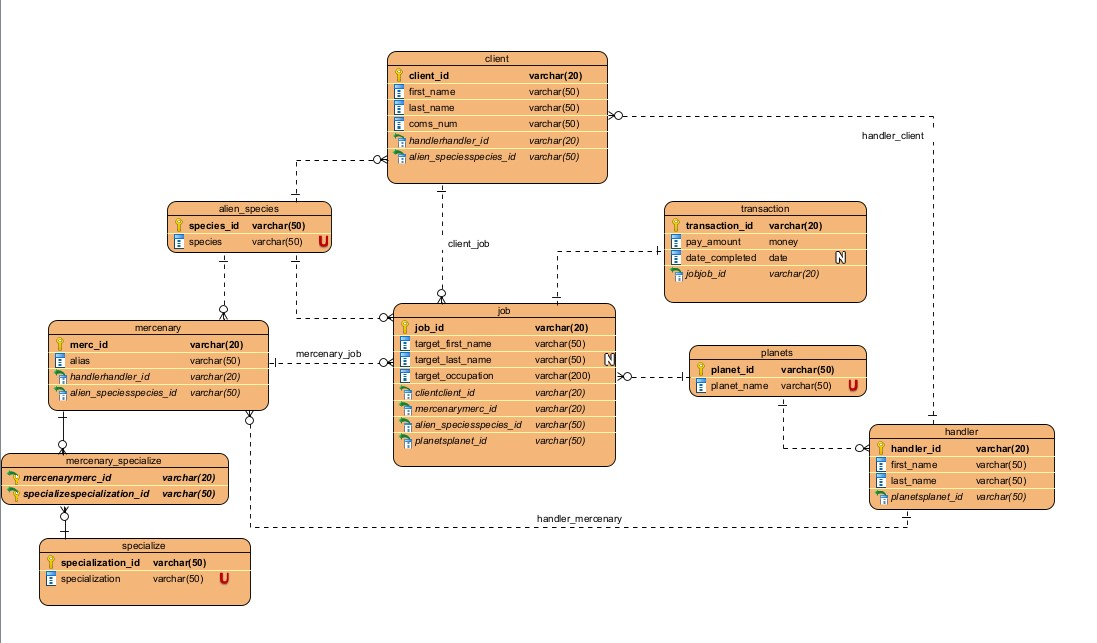

### EZ Merc Intergalactic Database DDL

Create the following tables: client, handler, job, mercenary, planets, alien_species, specialize, transaction, and mercenary_specialize

In [ ]:
CREATE TABLE client (
    client_id varchar(20) NOT NULL,
    first_name varchar(50) NOT NULL,
    last_name varchar(50) NOT NULL, coms_num varchar(50) NOT NULL,
    handlerhandler_id varchar(20) NOT NULL,
    alien_speciesspecies_id varchar(50) NOT NULL,
    PRIMARY KEY (client_id));

CREATE TABLE handler (
    handler_id varchar(20) NOT NULL,
    first_name varchar(50) NOT NULL,
    last_name varchar(50) NOT NULL,
    planetsplanet_id varchar(50) NOT NULL,
    PRIMARY KEY (handler_id));

CREATE TABLE job (
    job_id varchar(20) NOT NULL,
    target_first_name varchar(50) NOT NULL,
    target_last_name varchar(50) NULL,
    target_occupation varchar(200) NOT NULL,
    clientclient_id varchar(20) NOT NULL,
    mercenarymerc_id varchar(20) NOT NULL,
    alien_speciesspecies_id varchar(50) NOT NULL,
    planetsplanet_id varchar(50) NOT NULL,
    PRIMARY KEY (job_id));

CREATE TABLE mercenary (
    merc_id varchar(20) NOT NULL,
    alias varchar(50) NOT NULL,
    handlerhandler_id varchar(20) NOT NULL,
    alien_speciesspecies_id varchar(50) NOT NULL,
    PRIMARY KEY (merc_id));

CREATE TABLE planets (
    planet_id varchar(50) NOT NULL,
    planet_name varchar(50) NOT NULL UNIQUE,
    PRIMARY KEY (planet_id));

CREATE TABLE alien_species (
    species_id varchar(50) NOT NULL,
    species varchar(50) NOT NULL UNIQUE,
    PRIMARY KEY (species_id));

CREATE TABLE specialize (
    specialization_id varchar(50) NOT NULL,
    specialization varchar(50) NOT NULL UNIQUE,
    PRIMARY KEY (specialization_id));

CREATE TABLE [transaction] (
    transaction_id varchar(20) NOT NULL,
    pay_amount money NOT NULL,
    date_completed date NULL,
    jobjob_id varchar(20) NOT NULL,
    PRIMARY KEY (transaction_id));

CREATE TABLE mercenary_specialize (
    mercenarymerc_id varchar(20) NOT NULL,
    specializespecialization_id varchar(50) NOT NULL,
    PRIMARY KEY (mercenarymerc_id, specializespecialization_id));

### Alter EZ Merc Intergalactic Tables DDL

Alter job, client, mercenary, handler, transaction, and mercenary_specialize tables to add constraints, foreign keys, and references

In [ ]:
ALTER TABLE job 
    ADD CONSTRAINT mercenary_job 
    FOREIGN KEY (mercenarymerc_id) 
    REFERENCES mercenary (merc_id);

ALTER TABLE client ADD CONSTRAINT handler_client 
    FOREIGN KEY (handlerhandler_id) 
    REFERENCES handler (handler_id);

ALTER TABLE mercenary 
    ADD CONSTRAINT handler_mercenary 
    FOREIGN KEY (handlerhandler_id) 
    REFERENCES handler (handler_id);

ALTER TABLE job 
    ADD CONSTRAINT client_job 
    FOREIGN KEY (clientclient_id) 
    REFERENCES client (client_id);

ALTER TABLE mercenary 
    ADD CONSTRAINT FKmercenary0 
    FOREIGN KEY (alien_speciesspecies_id) 
    REFERENCES alien_species (species_id);

ALTER TABLE job 
    ADD CONSTRAINT FKjob0 
    FOREIGN KEY (alien_speciesspecies_id) 
    REFERENCES alien_species (species_id);

ALTER TABLE client 
    ADD CONSTRAINT FKclient9613 
    FOREIGN KEY (alien_speciesspecies_id) 
    REFERENCES alien_species (species_id);

ALTER TABLE handler 
    ADD CONSTRAINT FKhandler 
    FOREIGN KEY (planetsplanet_id) 
    REFERENCES planets (planet_id);

ALTER TABLE job 
    ADD CONSTRAINT FKjob1 
    FOREIGN KEY (planetsplanet_id) 
    REFERENCES planets (planet_id);

ALTER TABLE [transaction] 
    ADD CONSTRAINT FKtransaction 
    FOREIGN KEY (jobjob_id) 
    REFERENCES job (job_id);

ALTER TABLE mercenary_specialize 
    ADD CONSTRAINT FKmercenary1 
    FOREIGN KEY (mercenarymerc_id) 
    REFERENCES mercenary (merc_id);

ALTER TABLE mercenary_specialize 
    ADD CONSTRAINT FKmercenary2 
    FOREIGN KEY (specializespecialization_id) 
    REFERENCES specialize (specialization_id);

### Python to Generate Data

##### Planets Table Data Generation: Faker and BeautifulSoup

In [ ]:
import requests
from faker import Faker
import pandas as pd
from bs4 import BeautifulSoup
import re

fkr = Faker()
planet_id = []
planet_name = []

# Scrape content from screenrant.com using BeautifulSoup
starwars_content = requests.get(url='https://screenrant.com/star-wars-rogue-one-planets-ranked-jedha-scarif-tatooine/')
starwars_page = BeautifulSoup(starwars_content.text, 'html.parser')
find_planets = starwars_page.find_all('h2')

# Clean screenrant data and append names and ids to lists
for element in find_planets:
    element = re.sub('\d+\.\s', '', element.text.strip())
    planet_name.append(element)
    planet_id.append('pp' + str(fkr.random_number(digits=5, fix_len=True)))

planet_data_frame = pd.DataFrame(zip(planet_id, planet_name), columns=['Planet ID', 'Planet'])

planet_data_frame.to_csv('planets.csv', index=False)

##### Alien Species Table Data Generation: Faker and BeautifulSoup

In [ ]:
from faker import Faker
from bs4 import BeautifulSoup
import pandas as pd
import requests
import re

fkr = Faker()
species_id = []
species = []

# Scrape content from swse.fandom.com using BeautifulSoup
species_content = requests.get(url='https://swse.fandom.com/wiki/Species')
species_page = BeautifulSoup(species_content.text, 'html.parser')
species_tables = species_page.find('table', class_='wikitable')


# Find species_text in each data cell in species_tables and append to species list and fill species_id list with data
# created in Faker
for row in species_tables.tbody.find_all('tr'):
    columns = row.find_all('td')
    if columns:
        species_text = re.sub('\*', '', columns[0].text.strip())
        species.append(species_text)
        species_id.append('ss' + str(fkr.random_number(digits=5, fix_len=True)))

species_data_frame = pd.DataFrame(zip(species_id, species), columns=['Species ID', 'Species'])

species_data_frame.to_csv('alien_species.csv', index=False)

##### Specialization Table Data Generation: Self-Created

In [ ]:
import pandas as pd

# Fill specialization_data list with dictionaries created by me
specialization_data = [{'Specialization ID': 'ss00',
                        'Specialize': 'Smuggling'},
                       {'Specialization ID': 'ss01',
                        'Specialize': 'Heavy Weaponry'},
                       {'Specialization ID': 'ss02',
                        'Specialize': 'Light Weaponry'},
                       {'Specialization ID': 'ss03',
                        'Specialize': 'Poison'},
                       {'Specialization ID': 'ss04',
                        'Specialize': 'Hand-to-hand Combat'},
                       {'Specialization ID': 'ss05',
                        'Specialize': 'Piloting'},
                       {'Specialization ID': 'ss06',
                        'Specialize': 'Explosives'},
                       {'Specialization ID': 'ss07',
                        'Specialize': 'Hacking'},
                       {'Specialization ID': 'ss08',
                        'Specialize': 'Medic'}
                       ]

specialization_data_frame = pd.DataFrame(specialization_data)

specialization_data_frame.to_csv('special.csv', index=False)

##### Handler Table Data Generation: Self-Created

In [ ]:
import pandas as pd

# Import planets.csv
planet_df = pd.read_csv('planets.csv')

# Fill handler_data list with dictionaries created by me
handler_data = [{'handler_id': 'hh00',
                 'first_name': 'Greef',
                 'last_name': 'Karga'},
                {'handler_id': 'hh01',
                 'first_name': 'Morgan',
                 'last_name': 'Northerniz'},
                {'handler_id': 'hh02',
                 'first_name': 'Jabba',
                 'last_name': 'The Hutt'},
                {'handler_id': 'hh03',
                 'first_name': 'Hando',
                 'last_name': 'Malteez'},
                {'handler_id': 'hh04',
                 'first_name': 'Ben',
                 'last_name': 'Kanobi'},
                {'handler_id': 'hh05',
                 'first_name': 'Mr.',
                 'last_name': 'X'},
                {'handler_id': 'hh06',
                 'first_name': 'Archie',
                 'last_name': 'Williams'},
                {'handler_id': 'hh07',
                 'first_name': 'Green',
                 'last_name': 'Blueman'}
                ]

handler_data_frame = pd.DataFrame(handler_data)
handler_data_frame['Planet ID'] = planet_df['Planet ID'].sample(n=8, replace=True, ignore_index=True)

handler_data_frame.to_csv('handler.csv', index=False)

##### Client Table Data Generation: Faker and OpenAI's ChatGPT API

In [ ]:
from faker import Faker
import pandas as pd
import re
import openai
openai.api_key = 'XXXXXXXX'

# Import handler.csv and alien_species.csv
handler_df = pd.read_csv('handler.csv')
alien_df = pd.read_csv('alien_species.csv')

fkr = Faker()
client_id = []
coms_num = []
client_fname = []
client_lname = []


# Query ChatGPT API and return an answer
def get_answer(question):
    question = openai.Completion.create(
        engine='text-davinci-002',
        prompt=question,
        max_tokens=100,
        n=1,
        stop=None,
        temperature=0.5
    )
    return question.choices[0].text.strip()


# Take answer from get_answer() method and clean whitespace, numbers, periods, and newlines
def clean_answer(answer):
    return re.sub('[\d+\.]', '', answer)


# Append to client_fname and client_lname with returns from ChatGPT methods
# and to client_id and coms_num lists with data created from Faker
def clientdata(num_rows, query, query1):
    for element in range(num_rows):
        answer = get_answer(query)
        client_fname.append(clean_answer(answer))
        answer1 = get_answer(query1)
        client_lname.append(clean_answer(answer1))
        client_id.append('cc' + str(fkr.random_number(digits=5, fix_len=True)))
        coms_num.append(fkr.password(length=14, special_chars=False))


# Queries to generate data from ChatGPT
q_first_names = 'Generate 1 random science fiction character first name'
q_last_names = 'Generate 1 random science fiction character last name'

clientdata(600, q_first_names, q_last_names)
client_dataframe = pd.DataFrame(zip(client_id, client_fname, client_lname, coms_num), columns=['Client ID',
                                                                                               'First Name',
                                                                                               'Last Name',
                                                                                               'Comms Number'])
client_dataframe['Handler ID'] = handler_df['handler_id'].sample(n=600,  replace=True, ignore_index=True)
client_dataframe['Species ID'] = alien_df['Species ID'].sample(n=600, replace=True, ignore_index=True)

client_dataframe.to_csv('client.csv', index=False)

##### Mercenary Table Data Generation: Faker and BeautifulSoup

In [ ]:
from faker import Faker
from bs4 import BeautifulSoup
import pandas as pd
import requests

# Import handler_id, alien_id
handler_df = pd.read_csv('handler.csv')
alien_df = pd.read_csv('alien_species.csv')

fkr = Faker()
merc_id = []
alias = []

# Scrape data from screenrant.com using BeautifulSoup
merc_content = requests.get(url='https://screenrant.com/star-wars-bounty-hunters-movies-shows-canon-explained/')
merc_page = BeautifulSoup(merc_content.text, 'html.parser')
merc_text = merc_page.find_all('h2')

# Append screenrant data and merc_id data imported form Faker to lists
for element in merc_text:
    merc_id.append('mm' + str(fkr.random_number(digits=5, fix_len=True)))
    alias.append(element.text)

merc_dataframe = pd.DataFrame(zip(merc_id, alias), columns=['Mercenary ID', 'Alias'])
merc_dataframe['Handler ID'] = handler_df['handler_id'].sample(n=64, replace=True, ignore_index=True)
merc_dataframe['Species ID'] = alien_df['Species ID'].sample(n=64, replace=True, ignore_index=True)

merc_dataframe.to_csv('mercenary.csv', index=False)

##### Mercenary Specialty Table Data Generation: Combined Table

In [ ]:
import pandas as pd

# Combine IDs from mercenary and specialize
merc_df = pd.read_csv('csv_files/mercenary.csv')
special_df = pd.read_csv('csv_files/special.csv')

merc_special_dataframe = pd.DataFrame()
merc_special_dataframe['Mercenary ID'] = merc_df['Mercenary ID']
merc_special_dataframe['Specialization ID'] = special_df['Specialization ID'].sample(n=64, replace=True,
                                                                                     ignore_index=True)

merc_special_dataframe.to_csv('csv_files/merc_special.csv', index=False)

##### Job Table Data Generation: Faker

In [ ]:
from faker import Faker
import pandas as pd

# Import planets.csv, alien_species.csv, client.csv, and mercenary.csv
planet_df = pd.read_csv('planets.csv')
alien_df = pd.read_csv('alien_species.csv')
client_df = pd.read_csv('client.csv')
merc_df = pd.read_csv('mercenary.csv')

fkr = Faker()
target_id = []
target_fname = []
target_lname = []
target_occ = []


# Append data created in Faker to lists defined above
def targetdata(num_rows):
    for element in range(num_rows):
        target_id.append('tt' + str(fkr.random_number(digits=5, fix_len=True)))
        target_fname.append(fkr.last_name())
        target_lname.append(fkr.language_name())
        target_occ.append(fkr.job())


targetdata(600)
target_dataframe = pd.DataFrame(zip(target_id, target_fname, target_lname, target_occ),
                                columns=['Target ID', 'Target First Names', 'Target Last Names', 'Occupation'])
target_dataframe['Planet ID'] = planet_df['Planet ID'].sample(n=600, replace=True, ignore_index=True)
target_dataframe['Client ID'] = client_df['Client ID']
target_dataframe['Mercenary ID'] = merc_df['Mercenary ID'].sample(n=600, replace=True, ignore_index=True)
target_dataframe['Species ID'] = alien_df['Species ID'].sample(n=600, replace=True, ignore_index=True)

target_dataframe.to_csv('job.csv', index=False)

##### Transaction Table Data Generation: Faker

In [ ]:
from faker import Faker
from datetime import datetime
import pandas as pd

# Import client.csv and job.csv
client_df = pd.read_csv('client.csv')
job_df = pd.read_csv('job.csv')

fkr = Faker()
trans_id = []
pay_amount = []
date_completed = []


# Append Faker data to trans_id, pay_amount, and date_completed lists
def transdata(num_rows):
    for i in range(num_rows):
        trans_id.append('tt' + str(fkr.random_number(digits=5, fix_len=True)))
        pay_amount.append(fkr.pricetag())
        date_completed.append(fkr.future_date(end_date=datetime(3000, 1, 2)))


transdata(600)
trans_dataframe = pd.DataFrame(zip(trans_id, pay_amount, date_completed), columns=["Transaction ID", "Payment Amount",
                                                                                   "Date Completed"])
trans_dataframe['Client ID'] = client_df['Client ID']
trans_dataframe['Job ID'] = job_df['Target ID']

trans_dataframe.to_csv('transaction.csv', index=False)

### Data Lake Formation:
 Data lake created using AWS Lake Formation with Glue Catalog hosted on administrator account

##### ETL Jobs:
 Glue ETL Job to transfer raw data from Amazon RDS to Amazon S3 Data Lake, updating Data Catalog verified

In [ ]:
import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job
from awsglue.dynamicframe import DynamicFrame


def directJDBCSource(
    glueContext,
    connectionName,
    connectionType,
    database,
    table,
    redshiftTmpDir,
    transformation_ctx,
) -> DynamicFrame:
    connection_options = {
        "useConnectionProperties": "true",
        "dbtable": table,
        "connectionName": connectionName,
    }

    if redshiftTmpDir:
        connection_options["redshiftTmpDir"] = redshiftTmpDir

    return glueContext.create_dynamic_frame.from_options(
        connection_type=connectionType,
        connection_options=connection_options,
        transformation_ctx=transformation_ctx,
    )


args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)


# Script generated for node trans_source
trans_source_node1679416816191 = directJDBCSource(
    glueContext,
    connectionName="ez-merc-connection-2",
    connectionType="sqlserver",
    database="ez-merc-ig-db.cqznmpskxrfs.us-west-2.rds.amazonaws.com:1433;databaseName=EZMercIGdb",
    table="dbo.transaction",
    redshiftTmpDir="",
    transformation_ctx="trans_source_node1679416816191",
)


# Script generated for node planet_source
planet_source_node1679416633872 = directJDBCSource(
    glueContext,
    connectionName="ez-merc-connection-2",
    connectionType="sqlserver",
    database="ez-merc-ig-db.cqznmpskxrfs.us-west-2.rds.amazonaws.com:1433;databaseName=EZMercIGdb",
    table="dbo.planets",
    redshiftTmpDir="",
    transformation_ctx="planet_source_node1679416633872",
)


# Script generated for node species_source
species_source_node1 = directJDBCSource(
    glueContext,
    connectionName="ez-merc-connection-2",
    connectionType="sqlserver",
    database="ez-merc-ig-db.cqznmpskxrfs.us-west-2.rds.amazonaws.com:1433;databaseName=EZMercIGdb",
    table="dbo.alien_species",
    redshiftTmpDir="",
    transformation_ctx="species_source_node1",
)


# Script generated for node handler_source
handler_source_node1679416296615 = directJDBCSource(
    glueContext,
    connectionName="ez-merc-connection-2",
    connectionType="sqlserver",
    database="ez-merc-ig-db.cqznmpskxrfs.us-west-2.rds.amazonaws.com:1433;databaseName=EZMercIGdb",
    table="dbo.handler",
    redshiftTmpDir="",
    transformation_ctx="handler_source_node1679416296615",
)


# Script generated for node job_source
job_source_node1679416369538 = directJDBCSource(
    glueContext,
    connectionName="ez-merc-connection-2",
    connectionType="sqlserver",
    database="ez-merc-ig-db.cqznmpskxrfs.us-west-2.rds.amazonaws.com:1433;databaseName=EZMercIGdb",
    table="dbo.job",
    redshiftTmpDir="",
    transformation_ctx="job_source_node1679416369538",
)


# Script generated for node merc_source
merc_source_node1679416545600 = directJDBCSource(
    glueContext,
    connectionName="ez-merc-connection-2",
    connectionType="sqlserver",
    database="ez-merc-ig-db.cqznmpskxrfs.us-west-2.rds.amazonaws.com:1433;databaseName=EZMercIGdb",
    table="dbo.mercenary",
    redshiftTmpDir="",
    transformation_ctx="merc_source_node1679416545600",
)


# Script generated for node spec_merc_source
spec_merc_source_node1679416442506 = directJDBCSource(
    glueContext,
    connectionName="ez-merc-connection-2",
    connectionType="sqlserver",
    database="ez-merc-ig-db.cqznmpskxrfs.us-west-2.rds.amazonaws.com:1433;databaseName=EZMercIGdb",
    table="dbo.specialize_Mercenary",
    redshiftTmpDir="",
    transformation_ctx="spec_merc_source_node1679416442506",
)


# Script generated for node client_source
client_source_node1679416211537 = directJDBCSource(
    glueContext,
    connectionName="ez-merc-connection-2",
    connectionType="sqlserver",
    database="ez-merc-ig-db.cqznmpskxrfs.us-west-2.rds.amazonaws.com:1433;databaseName=EZMercIGdb",
    table="dbo.client",
    redshiftTmpDir="",
    transformation_ctx="client_source_node1679416211537",
)


# Script generated for node spec_source
spec_source_node1679416734655 = directJDBCSource(
    glueContext,
    connectionName="ez-merc-connection-2",
    connectionType="sqlserver",
    database="ez-merc-ig-db.cqznmpskxrfs.us-west-2.rds.amazonaws.com:1433;databaseName=EZMercIGdb",
    table="dbo.specialize",
    redshiftTmpDir="",
    transformation_ctx="spec_source_node1679416734655",
)


# Script generated for node trans_bucket
trans_bucket_node1679416854047 = glueContext.getSink(
    path="s3://ez-merc-intergalactic/ez-merc-raw/transaction/",
    connection_type="s3",
    updateBehavior="UPDATE_IN_DATABASE",
    partitionKeys=[],
    enableUpdateCatalog=True,
    transformation_ctx="trans_bucket_node1679416854047",
)

trans_bucket_node1679416854047.setCatalogInfo(
    catalogDatabase="ez-merc-db", catalogTableName="trans"
)

trans_bucket_node1679416854047.setFormat("glueparquet")

trans_bucket_node1679416854047.writeFrame(trans_source_node1679416816191)


# Script generated for node planet_bucket
planet_bucket_node1679416636015 = glueContext.getSink(
    path="s3://ez-merc-intergalactic/ez-merc-raw/planet/",
    connection_type="s3",
    updateBehavior="UPDATE_IN_DATABASE",
    partitionKeys=[],
    enableUpdateCatalog=True,
    transformation_ctx="planet_bucket_node1679416636015",
)

planet_bucket_node1679416636015.setCatalogInfo(
    catalogDatabase="ez-merc-db", catalogTableName="planet"
)

planet_bucket_node1679416636015.setFormat("glueparquet")

planet_bucket_node1679416636015.writeFrame(planet_source_node1679416633872)


# Script generated for node species_bucket
species_bucket_node3 = glueContext.getSink(
    path="s3://ez-merc-intergalactic/ez-merc-raw/alien_species/",
    connection_type="s3",
    updateBehavior="UPDATE_IN_DATABASE",
    partitionKeys=[],
    enableUpdateCatalog=True,
    transformation_ctx="species_bucket_node3",
)

species_bucket_node3.setCatalogInfo(
    catalogDatabase="ez-merc-db", catalogTableName="alien_species"
)

species_bucket_node3.setFormat("glueparquet")

species_bucket_node3.writeFrame(species_source_node1)


# Script generated for node handler_bucket
handler_bucket_node1679416330684 = glueContext.getSink(
    path="s3://ez-merc-intergalactic/ez-merc-raw/handler/",
    connection_type="s3",
    updateBehavior="UPDATE_IN_DATABASE",
    partitionKeys=[],
    enableUpdateCatalog=True,
    transformation_ctx="handler_bucket_node1679416330684",
)

handler_bucket_node1679416330684.setCatalogInfo(
    catalogDatabase="ez-merc-db", catalogTableName="handler"
)

handler_bucket_node1679416330684.setFormat("glueparquet")

handler_bucket_node1679416330684.writeFrame(handler_source_node1679416296615)


# Script generated for node job_bucket
job_bucket_node1679416400394 = glueContext.getSink(
    path="s3://ez-merc-intergalactic/ez-merc-raw/job/",
    connection_type="s3",
    updateBehavior="UPDATE_IN_DATABASE",
    partitionKeys=[],
    enableUpdateCatalog=True,
    transformation_ctx="job_bucket_node1679416400394",
)

job_bucket_node1679416400394.setCatalogInfo(
    catalogDatabase="ez-merc-db", catalogTableName="job"
)

job_bucket_node1679416400394.setFormat("glueparquet")

job_bucket_node1679416400394.writeFrame(job_source_node1679416369538)


# Script generated for node merc_bucket
merc_bucket_node1679416578593 = glueContext.getSink(
    path="s3://ez-merc-intergalactic/ez-merc-raw/merc/",
    connection_type="s3",
    updateBehavior="UPDATE_IN_DATABASE",
    partitionKeys=[],
    enableUpdateCatalog=True,
    transformation_ctx="merc_bucket_node1679416578593",
)

merc_bucket_node1679416578593.setCatalogInfo(
    catalogDatabase="ez-merc-db", catalogTableName="merc"
)

merc_bucket_node1679416578593.setFormat("glueparquet")

merc_bucket_node1679416578593.writeFrame(merc_source_node1679416545600)


# Script generated for node spec_merc_bucket
spec_merc_bucket_node1679416479546 = glueContext.getSink(
    path="s3://ez-merc-intergalactic/ez-merc-raw/merc-specialize/",
    connection_type="s3",
    updateBehavior="UPDATE_IN_DATABASE",
    partitionKeys=[],
    enableUpdateCatalog=True,
    transformation_ctx="spec_merc_bucket_node1679416479546",
)

spec_merc_bucket_node1679416479546.setCatalogInfo(
    catalogDatabase="ez-merc-db", catalogTableName="spec_merc"
)

spec_merc_bucket_node1679416479546.setFormat("glueparquet")

spec_merc_bucket_node1679416479546.writeFrame(spec_merc_source_node1679416442506)


# Script generated for node client_bucket
client_bucket_node1679416213620 = glueContext.getSink(
    path="s3://ez-merc-intergalactic/ez-merc-raw/client/",
    connection_type="s3",
    updateBehavior="UPDATE_IN_DATABASE",
    partitionKeys=[],
    enableUpdateCatalog=True,
    transformation_ctx="client_bucket_node1679416213620",
)

client_bucket_node1679416213620.setCatalogInfo(
    catalogDatabase="ez-merc-db", catalogTableName="client"
)

client_bucket_node1679416213620.setFormat("glueparquet")

client_bucket_node1679416213620.writeFrame(client_source_node1679416211537)


# Script generated for node spec_bucket
spec_bucket_node1679416777568 = glueContext.getSink(
    path="s3://ez-merc-intergalactic/ez-merc-raw/specialize/",
    connection_type="s3",
    updateBehavior="UPDATE_IN_DATABASE",
    partitionKeys=[],
    enableUpdateCatalog=True,
    transformation_ctx="spec_bucket_node1679416777568",
)

spec_bucket_node1679416777568.setCatalogInfo(
    catalogDatabase="ez-merc-db", catalogTableName="spec"
)

spec_bucket_node1679416777568.setFormat("glueparquet")

spec_bucket_node1679416777568.writeFrame(spec_source_node1679416734655)


job.commit()

Glue ETL job to correct column datatypes verified

In [ ]:
import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job

args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)


# Script generated for node client_raw
client_raw_node1679417785244 = glueContext.create_dynamic_frame.from_options(
    format_options={},
    connection_type="s3",
    format="parquet",
    connection_options={
        "paths": ["s3://ez-merc-intergalactic/ez-merc-raw/client/"],
        "recurse": True,
    },
    transformation_ctx="client_raw_node1679417785244",
)


# Script generated for node planet_raw
planet_raw_node1679418280693 = glueContext.create_dynamic_frame.from_options(
    format_options={},
    connection_type="s3",
    format="parquet",
    connection_options={
        "paths": ["s3://ez-merc-intergalactic/ez-merc-raw/planet/"],
        "recurse": True,
    },
    transformation_ctx="planet_raw_node1679418280693",
)


# Script generated for node merc_raw
merc_raw_node1679418166252 = glueContext.create_dynamic_frame.from_options(
    format_options={},
    connection_type="s3",
    format="parquet",
    connection_options={
        "paths": ["s3://ez-merc-intergalactic/ez-merc-raw/merc/"],
        "recurse": True,
    },
    transformation_ctx="merc_raw_node1679418166252",
)


# Script generated for node species_raw
species_raw_node1 = glueContext.create_dynamic_frame.from_options(
    format_options={},
    connection_type="s3",
    format="parquet",
    connection_options={
        "paths": ["s3://ez-merc-intergalactic/ez-merc-raw/alien_species/"],
        "recurse": True,
    },
    transformation_ctx="species_raw_node1",
)


# Script generated for node trans_raw
trans_raw_node1679419774640 = glueContext.create_dynamic_frame.from_options(
    format_options={},
    connection_type="s3",
    format="parquet",
    connection_options={
        "paths": ["s3://ez-merc-intergalactic/ez-merc-raw/transaction/"],
        "recurse": True,
    },
    transformation_ctx="trans_raw_node1679419774640",
)


# Script generated for node merc_spec_raw
merc_spec_raw_node1679418068628 = glueContext.create_dynamic_frame.from_options(
    format_options={},
    connection_type="s3",
    format="parquet",
    connection_options={
        "paths": ["s3://ez-merc-intergalactic/ez-merc-raw/merc-specialize/"],
        "recurse": True,
    },
    transformation_ctx="merc_spec_raw_node1679418068628",
)


# Script generated for node spec_raw
spec_raw_node1679419687959 = glueContext.create_dynamic_frame.from_options(
    format_options={},
    connection_type="s3",
    format="parquet",
    connection_options={
        "paths": ["s3://ez-merc-intergalactic/ez-merc-raw/specialize/"],
        "recurse": True,
    },
    transformation_ctx="spec_raw_node1679419687959",
)


# Script generated for node handler_raw
handler_raw_node1679417873060 = glueContext.create_dynamic_frame.from_options(
    format_options={},
    connection_type="s3",
    format="parquet",
    connection_options={
        "paths": ["s3://ez-merc-intergalactic/ez-merc-raw/handler/"],
        "recurse": True,
    },
    transformation_ctx="handler_raw_node1679417873060",
)


# Script generated for node job_raw
job_raw_node1679417966100 = glueContext.create_dynamic_frame.from_options(
    format_options={},
    connection_type="s3",
    format="parquet",
    connection_options={
        "paths": ["s3://ez-merc-intergalactic/ez-merc-raw/job/"],
        "recurse": True,
    },
    transformation_ctx="job_raw_node1679417966100",
)


# Script generated for node client_edit
client_edit_node1679417790043 = ApplyMapping.apply(
    frame=client_raw_node1679417785244,
    mappings=[
        ("client_id", "string", "client_id", "string"),
        ("first_name", "string", "first_name", "string"),
        ("last_name", "string", "last_name", "string"),
        ("coms_num", "string", "coms_num", "string"),
        ("handlerhandler_id", "string", "handlerhandler_id", "string"),
        ("alien_speciesspecies_id", "string", "alien_speciesspecies_id", "string"),
    ],
    transformation_ctx="client_edit_node1679417790043",
)


# Script generated for node planet_edit
planet_edit_node1679418286013 = ApplyMapping.apply(
    frame=planet_raw_node1679418280693,
    mappings=[
        ("planet_id", "string", "planet_id", "string"),
        ("planet_name", "string", "planet_name", "string"),
    ],
    transformation_ctx="planet_edit_node1679418286013",
)


# Script generated for node merc_edit
merc_edit_node1679418168013 = ApplyMapping.apply(
    frame=merc_raw_node1679418166252,
    mappings=[
        ("merc_id", "string", "merc_id", "string"),
        ("alias", "string", "alias", "string"),
        ("handlerhandler_id", "string", "handlerhandler_id", "string"),
        ("alien_speciesspecies_id", "string", "alien_speciesspecies_id", "string"),
    ],
    transformation_ctx="merc_edit_node1679418168013",
)


# Script generated for node species_edit
species_edit_node2 = ApplyMapping.apply(
    frame=species_raw_node1,
    mappings=[
        ("species_id", "string", "species_id", "string"),
        ("species", "string", "species", "string"),
    ],
    transformation_ctx="species_edit_node2",
)


# Script generated for node trans_edit
trans_edit_node1679419776400 = ApplyMapping.apply(
    frame=trans_raw_node1679419774640,
    mappings=[
        ("transaction_id", "string", "transaction_id", "string"),
        ("pay_amount", "decimal", "pay_amount", "decimal"),
        ("date_completed", "date", "date_completed", "date"),
        ("clientclient_id", "string", "clientclient_id", "string"),
        ("jobjob_id", "string", "jobjob_id", "string"),
    ],
    transformation_ctx="trans_edit_node1679419776400",
)


# Script generated for node merc_spec_edit
merc_spec_edit_node1679418070444 = ApplyMapping.apply(
    frame=merc_spec_raw_node1679418068628,
    mappings=[
        (
            "specializespecialization_id",
            "string",
            "specializespecialization_id",
            "string",
        ),
        ("mercenarymerc_id", "string", "mercenarymerc_id", "string"),
    ],
    transformation_ctx="merc_spec_edit_node1679418070444",
)


# Script generated for node spec_edit
spec_edit_node1679419690224 = ApplyMapping.apply(
    frame=spec_raw_node1679419687959,
    mappings=[
        ("specialization_id", "string", "specialization_id", "string"),
        ("specialization", "string", "specialization", "string"),
    ],
    transformation_ctx="spec_edit_node1679419690224",
)


# Script generated for node handler_edit
handler_edit_node1679417876252 = ApplyMapping.apply(
    frame=handler_raw_node1679417873060,
    mappings=[
        ("handler_id", "string", "handler_id", "string"),
        ("first_name", "string", "first_name", "string"),
        ("last_name", "string", "last_name", "string"),
        ("planetsplanet_id", "string", "planetsplanet_id", "string"),
    ],
    transformation_ctx="handler_edit_node1679417876252",
)


# Script generated for node job_edit
job_edit_node1679417971324 = ApplyMapping.apply(
    frame=job_raw_node1679417966100,
    mappings=[
        ("job_id", "string", "job_id", "string"),
        ("target_first_name", "string", "target_first_name", "string"),
        ("target_last_name", "string", "target_last_name", "string"),
        ("target_occupation", "string", "target_occupation", "string"),
        ("clientclient_id", "string", "clientclient_id", "string"),
        ("mercenarymerc_id", "string", "mercenarymerc_id", "string"),
        ("alien_speciesspecies_id", "string", "alien_speciesspecies_id", "string"),
        ("planetsplanet_id", "string", "planetsplanet_id", "string"),
    ],
    transformation_ctx="job_edit_node1679417971324",
)


# Script generated for node client_clean
client_clean_node1679417795877 = glueContext.getSink(
    path="s3://ez-merc-intergalactic/ez-merc-data/client/",
    connection_type="s3",
    updateBehavior="UPDATE_IN_DATABASE",
    partitionKeys=[],
    enableUpdateCatalog=True,
    transformation_ctx="client_clean_node1679417795877",
)

client_clean_node1679417795877.setCatalogInfo(
    catalogDatabase="ez-merc-clean", catalogTableName="client_clean"
)

client_clean_node1679417795877.setFormat("glueparquet")

client_clean_node1679417795877.writeFrame(client_edit_node1679417790043)


# Script generated for node planet_clean
planet_clean_node1679418291709 = glueContext.getSink(
    path="s3://ez-merc-intergalactic/ez-merc-data/planet/",
    connection_type="s3",
    updateBehavior="UPDATE_IN_DATABASE",
    partitionKeys=[],
    enableUpdateCatalog=True,
    transformation_ctx="planet_clean_node1679418291709",
)

planet_clean_node1679418291709.setCatalogInfo(
    catalogDatabase="ez-merc-clean", catalogTableName="planet_clean"
)

planet_clean_node1679418291709.setFormat("glueparquet")

planet_clean_node1679418291709.writeFrame(planet_edit_node1679418286013)


# Script generated for node merc_clean
merc_clean_node1679418169964 = glueContext.getSink(
    path="s3://ez-merc-intergalactic/ez-merc-data/merc/",
    connection_type="s3",
    updateBehavior="UPDATE_IN_DATABASE",
    partitionKeys=[],
    enableUpdateCatalog=True,
    transformation_ctx="merc_clean_node1679418169964",
)

merc_clean_node1679418169964.setCatalogInfo(
    catalogDatabase="ez-merc-clean", catalogTableName="merc_clean"
)

merc_clean_node1679418169964.setFormat("glueparquet")

merc_clean_node1679418169964.writeFrame(merc_edit_node1679418168013)


# Script generated for node species_clean
species_clean_node3 = glueContext.getSink(
    path="s3://ez-merc-intergalactic/ez-merc-data/alien_species/",
    connection_type="s3",
    updateBehavior="UPDATE_IN_DATABASE",
    partitionKeys=[],
    enableUpdateCatalog=True,
    transformation_ctx="species_clean_node3",
)

species_clean_node3.setCatalogInfo(
    catalogDatabase="ez-merc-clean", catalogTableName="species_clean"
)

species_clean_node3.setFormat("glueparquet")

species_clean_node3.writeFrame(species_edit_node2)


# Script generated for node trans_clean
trans_clean_node1679419778080 = glueContext.getSink(
    path="s3://ez-merc-intergalactic/ez-merc-data/transaction/",
    connection_type="s3",
    updateBehavior="UPDATE_IN_DATABASE",
    partitionKeys=[],
    enableUpdateCatalog=True,
    transformation_ctx="trans_clean_node1679419778080",
)

trans_clean_node1679419778080.setCatalogInfo(
    catalogDatabase="ez-merc-clean", catalogTableName="trans_clean"
)

trans_clean_node1679419778080.setFormat("glueparquet")

trans_clean_node1679419778080.writeFrame(trans_edit_node1679419776400)


# Script generated for node merc_spec_clean
merc_spec_clean_node1679418072718 = glueContext.getSink(
    path="s3://ez-merc-intergalactic/ez-merc-data/merc_specialize/",
    connection_type="s3",
    updateBehavior="UPDATE_IN_DATABASE",
    partitionKeys=[],
    enableUpdateCatalog=True,
    transformation_ctx="merc_spec_clean_node1679418072718",
)

merc_spec_clean_node1679418072718.setCatalogInfo(
    catalogDatabase="ez-merc-clean", catalogTableName="merc_spec_clean"
)

merc_spec_clean_node1679418072718.setFormat("glueparquet")

merc_spec_clean_node1679418072718.writeFrame(merc_spec_edit_node1679418070444)


# Script generated for node spec_clean
spec_clean_node1679419692297 = glueContext.getSink(
    path="s3://ez-merc-intergalactic/ez-merc-data/specialize/",
    connection_type="s3",
    updateBehavior="UPDATE_IN_DATABASE",
    partitionKeys=[],
    enableUpdateCatalog=True,
    transformation_ctx="spec_clean_node1679419692297",
)

spec_clean_node1679419692297.setCatalogInfo(
    catalogDatabase="ez-merc-clean", catalogTableName="spec_clean"
)

spec_clean_node1679419692297.setFormat("glueparquet")

spec_clean_node1679419692297.writeFrame(spec_edit_node1679419690224)


# Script generated for node handler_clean
handler_clean_node1679417879836 = glueContext.getSink(
    path="s3://ez-merc-intergalactic/ez-merc-data/handler/",
    connection_type="s3",
    updateBehavior="UPDATE_IN_DATABASE",
    partitionKeys=[],
    enableUpdateCatalog=True,
    transformation_ctx="handler_clean_node1679417879836",
)

handler_clean_node1679417879836.setCatalogInfo(
    catalogDatabase="ez-merc-clean", catalogTableName="handler_clean"
)

handler_clean_node1679417879836.setFormat("glueparquet")

handler_clean_node1679417879836.writeFrame(handler_edit_node1679417876252)


# Script generated for node job_clean
job_clean_node1679417973190 = glueContext.getSink(
    path="s3://ez-merc-intergalactic/ez-merc-data/job/",
    connection_type="s3",
    updateBehavior="UPDATE_IN_DATABASE",
    partitionKeys=[],
    enableUpdateCatalog=True,
    transformation_ctx="job_clean_node1679417973190",
)

job_clean_node1679417973190.setCatalogInfo(
    catalogDatabase="ez-merc-clean", catalogTableName="job_clean"
)

job_clean_node1679417973190.setFormat("glueparquet")

job_clean_node1679417973190.writeFrame(job_edit_node1679417971324)


job.commit()

### Redshift Ingestion:
Created Glue Crawler to collect cleaned data from S3 Data Lake and stored in Glue Data Catalog 

##### Redshift Warehouse DDL
Create schema pulling directly from Glue Data Catalog

In [ ]:
CREATE EXTERNAL SCHEMA ez_merc_schema 
FROM DATA CATALOG DATABASE 'ez-merc-db'
IAM_ROLE 'XXXXXX'

### Data Visualization: Visual Paradigm 17.0

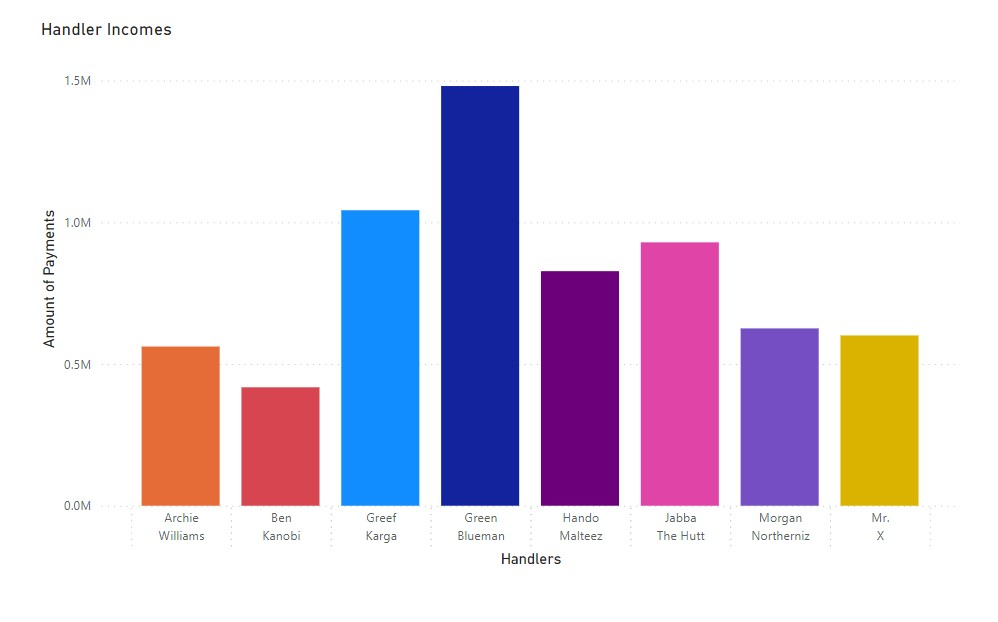

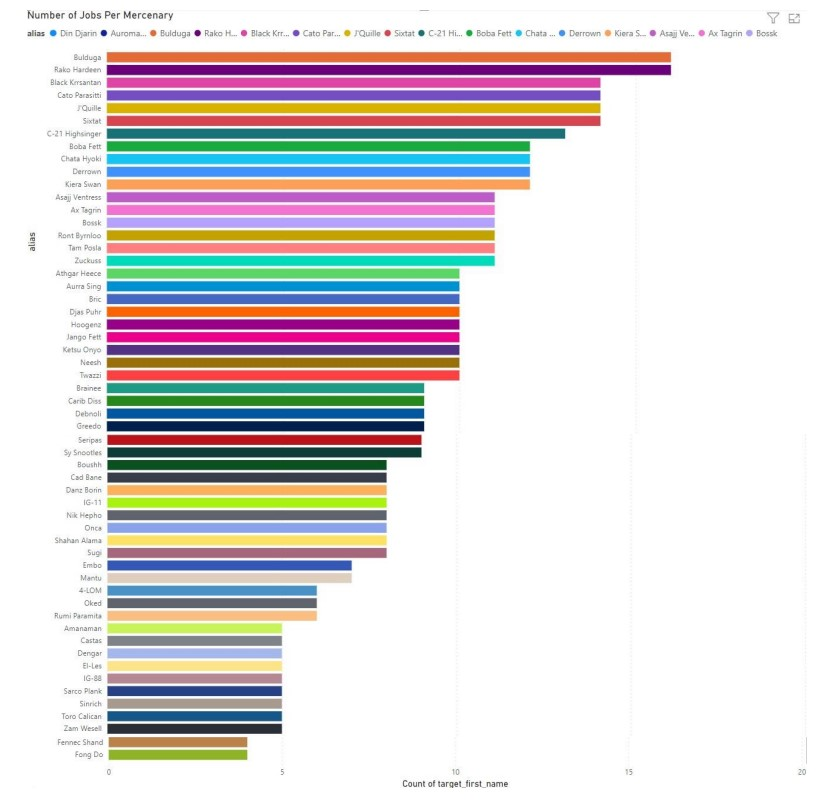

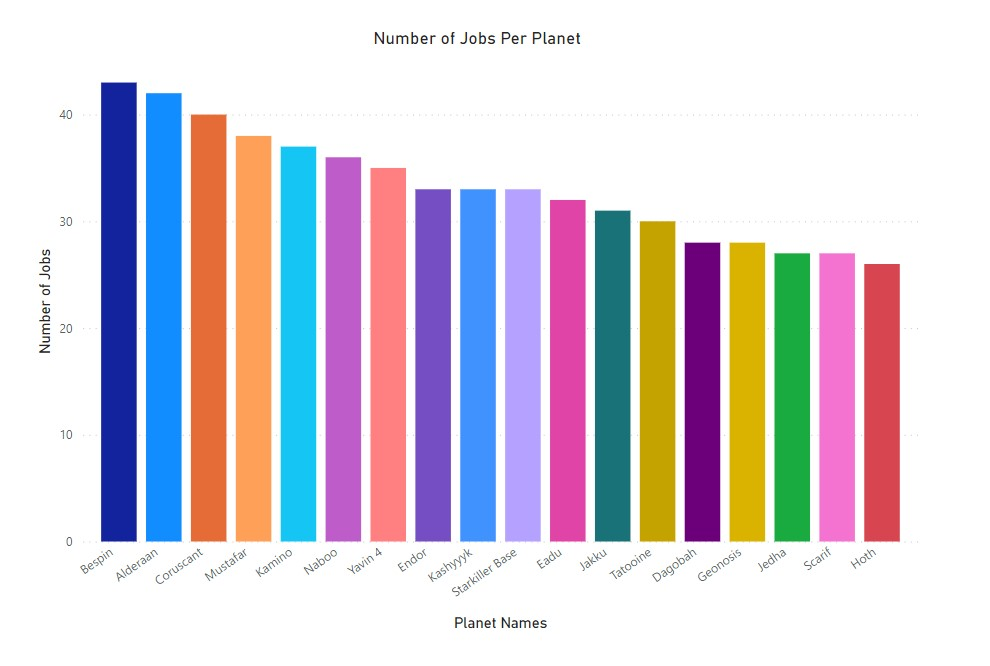

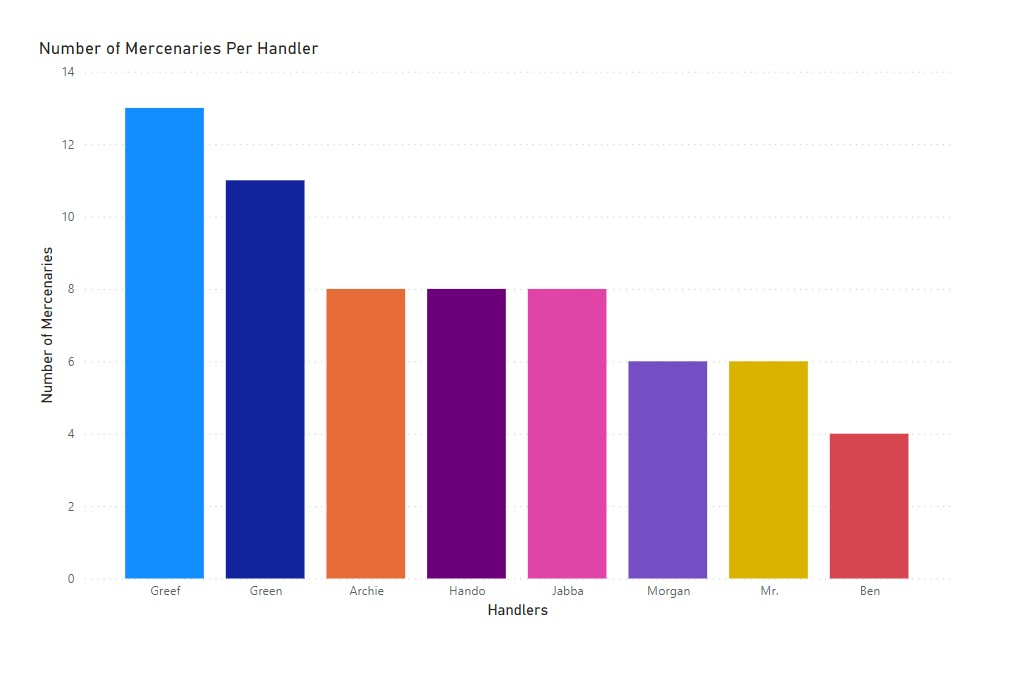

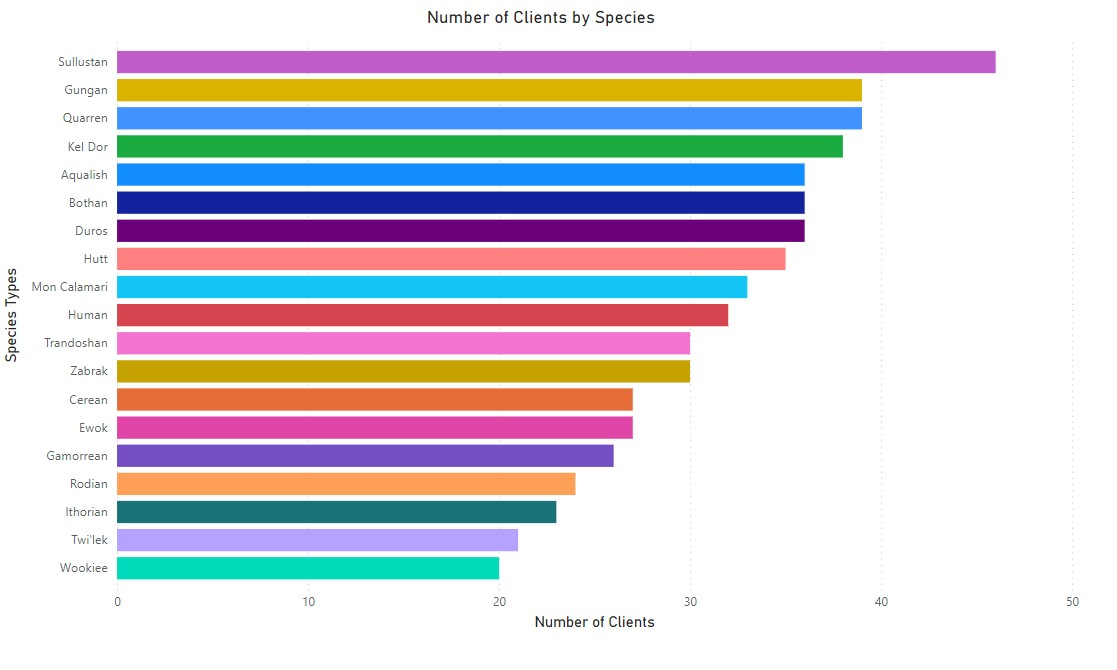